<a href="https://colab.research.google.com/github/su92-msaiw-f25-016-spec/lessons-learned/blob/main/temprature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
#Dataset
X = torch.tensor([[5], [8], [10], [12], [15], [18], [20], [22], [25], [28], [30], [35]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1]], dtype=torch.float32)

In [ ]:
#Convert into numpay
X_numpy = X.numpy()
y_numpy = y.numpy()
X_numpy,y_numpy

(array([[ 5.],
        [ 8.],
        [10.],
        [12.],
        [15.],
        [18.],
        [20.],
        [22.],
        [25.],
        [28.],
        [30.],
        [35.]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32))

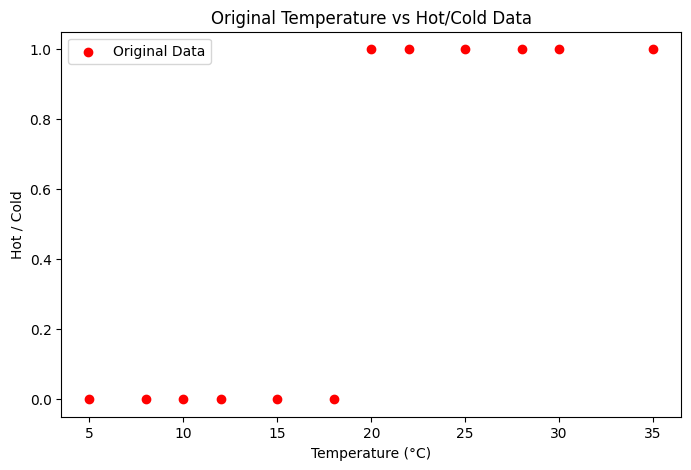

In [ ]:
#Show Raw datset
plt.figure(figsize=(8,5))
plt.scatter(X.numpy(), y.numpy(), color='red', label='Original Data')
plt.xlabel("Temperature (°C)")
plt.ylabel("Hot / Cold")
plt.title("Original Temperature vs Hot/Cold Data")
plt.legend()
plt.show()

In [ ]:
#Neural Network Model
class TemperatureModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
#Create object
model = TemperatureModel()

In [ ]:
#Loss function
criterion = nn.BCEWithLogitsLoss()

In [ ]:
#define Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 500

In [ ]:
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/500], Loss: 0.4006
Epoch [200/500], Loss: 0.3907
Epoch [300/500], Loss: 0.3814
Epoch [400/500], Loss: 0.3727
Epoch [500/500], Loss: 0.3645


**Prediction Function**

In [14]:
def predict_temperature(temp):
    temp_tensor = torch.tensor([[temp]], dtype=torch.float32)
    output = torch.sigmoid(model(temp_tensor))
    return "Hot" if output.item() >= 0.5 else "Cold"

**Test New Points**

In [15]:
new_temps = [15, 22, 30, 18, 25]
predictions = [predict_temperature(t) for t in new_temps]

for t, p in zip(new_temps, predictions):
    print(f"{t}°C : {p}")

15°C : Cold
22°C : Hot
30°C : Hot
18°C : Hot
25°C : Hot


**Visualization after training**

In [16]:
temp_range = torch.linspace(0, 40, 100).view(-1,1)
with torch.no_grad():
    pred_curve = torch.sigmoid(model(temp_range))